## 第五章 Logistic回归

### 5.2.2 使用梯度上升找到最佳参数

In [19]:
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('EXTRA/Ch05/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    #矩阵转置
    labelMatrix = mat(classLabels).transpose()
    m, n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMatrix - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

#Test.
# dataArr, labelArr = loadDataSet()
# gradAscent(dataArr, labelArr)

### 5.2.3 分析数据：画出决策边界

In [20]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i] == 1):
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1');plt.ylabel('X2');
    plt.show()
    
# #Test.
# dataArr, labelArr = loadDataSet()
# weights = gradAscent(dataArr, labelArr)
# # 矩阵通过这个getA()这个方法可以将自身返回成一个n维数组对象
# plotBestFit(weights.getA())

### 5.2.4 训练算法：随机梯度上升

In [41]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for  i in range(m):
        h = sigmoid(dataMatrix[i]*weights))
        error  = classLabels[i] - h
        weights = weights + alpha*error*dataMatrix[i]
    return weights

#Test.
dataArr, labelArr = loadDataSet()
weights = stocGradAscent0(dataArr, labelArr)
# 矩阵通过这个getA()这个方法可以将自身返回成一个n维数组对象
plotBestFit(weights)

C:\Library\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: operands could not be broadcast together with shapes (3,) (0,) 

#### 改进的随机梯度上升算法

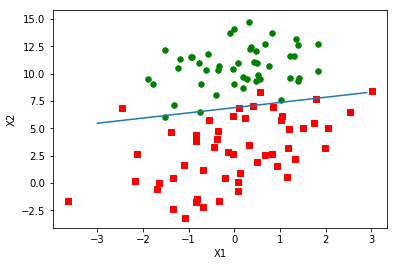

In [37]:
# def stocGradAscent1(dataMatrix, classLabels, numIter=150):
#     m,n = shape(dataMatrix)
#     weights = ones(n)
#     for j in range(numIter):
#         # python3.x   range返回的是range对象，不返回数组对象
#         dataIndex = list(range(m))
#         for  i in range(m):
#             alpha = 4/(1.0+i+j)+0.0001
#             # 随机选取index
#             randIndex = int(random.uniform(0,len(dataIndex)))
#             h = sigmoid(dataMatrix[randIndex]*weights)
#             error  = classLabels[randIndex] - h
#             weights = weights + alpha*error*dataMatrix[randIndex]
#             del(dataIndex[randIndex])
#     return weights

def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not 
            randIndex = int(random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

#Test.
dataArr, labelArr = loadDataSet()
weights = stocGradAscent1(array(dataArr), labelArr, )
# 矩阵通过这个getA()这个方法可以将自身返回成一个n维数组对象
plotBestFit(weights)